In [1]:
import pandas as pd
import glob
from matplotlib import pyplot
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Read Data

In [2]:
path_files_yahoo = '../../../Documents/phd_related/data_sets_concept_drift/anomaly_detection/Yahoo_A1Benchmark'

In [3]:
filenames_yahoo = glob.glob(path_files_yahoo+"/*.csv")

In [4]:
dfs_yahoo = []
for filename in filenames_yahoo:
    dfs_yahoo.append(pd.read_csv(filename))

In [5]:
df_yahoo = pd.concat(dfs_yahoo, ignore_index=True)
df_yahoo

,timestamp,value,is_anomaly
0,1,0.000000,0
1,2,0.862049,0
2,3,0.843723,0
3,4,0.000000,0
4,5,0.570083,0
...,...,...,...
94861,737,4.417394,0
94862,738,5.481198,0
94863,739,7.325727,0
94864,740,9.785980,0


<AxesSubplot:>

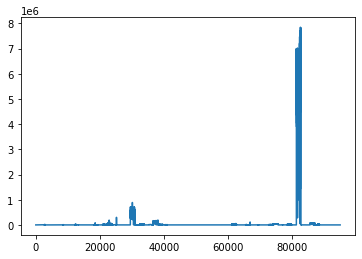

In [6]:
df_yahoo.value.plot()

# Split Train Test

We split data into 50% train and 50% test.

In [7]:
train_yahoo = df_yahoo[0:int(np.round(len(df_yahoo)/2))]
label_train = train_yahoo.is_anomaly
train_yahoo = train_yahoo.drop(['timestamp', 'is_anomaly'], axis = 1)

In [8]:
test_yahoo = df_yahoo[len(train_yahoo):]
label_test = test_yahoo.is_anomaly
test_yahoo = test_yahoo.drop(['timestamp', 'is_anomaly'], axis = 1)

In [9]:
print('Train Length', len(train_yahoo))
print('Test Length', len(test_yahoo))

Train Length 47433
Test Length 47433


# Data Preprocessing

### Train

In [10]:
scaler = MinMaxScaler()

In [11]:
train_yahoo_scale = scaler.fit_transform(np.array(train_yahoo.value).reshape(-1, 1))
train_yahoo_scale

array([[0.00000000e+00],
       [9.68917234e-07],
       [9.48319734e-07],
       ...,
       [3.45058969e-04],
       [5.18150439e-04],
       [5.63109262e-04]])

In [12]:
len(train_yahoo_scale)

47433

### Test

Scale testing data batches

In [13]:
len(test_yahoo)/24

1976.375

In [14]:
test_batches_yahoo = []
for i in range(0, len(test_yahoo), 24):
    test_batches_yahoo.append(scaler.transform(test_yahoo[i:i+24]))
test_batches_yahoo

/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Min

/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Min

/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Min

/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Min

/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Min

/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Min

/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Min

/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Min

/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/lorenapoenaru-olaru/PycharmProjects/concept_drift/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Min

[array([[6.42911174e-04],
        [2.24794117e-04],
        [1.57355882e-04],
        [2.36033823e-04],
        [9.66614702e-05],
        [9.44135290e-05],
        [6.74382350e-05],
        [7.08101468e-05],
        [8.65457349e-05],
        [1.05653235e-04],
        [2.04562646e-04],
        [2.24794117e-04],
        [2.07934558e-04],
        [2.23670146e-04],
        [2.09058529e-04],
        [2.38281764e-04],
        [2.06810587e-04],
        [1.94446911e-04],
        [2.22546176e-04],
        [2.76496764e-04],
        [2.84364558e-04],
        [3.46182940e-04],
        [5.37257939e-04],
        [3.96761616e-04]]),
 array([[3.40563087e-04],
        [3.12463822e-04],
        [2.06810587e-04],
        [1.38248382e-04],
        [7.98019114e-05],
        [6.63142644e-05],
        [6.96861762e-05],
        [8.20498526e-05],
        [9.44135290e-05],
        [9.66614702e-05],
        [2.05686617e-04],
        [1.88827058e-04],
        [2.33785881e-04],
        [2.47273528e-04],
        [2

# Data Shape

In [15]:
X_train = train_yahoo_scale.reshape(train_yahoo_scale.shape[0], 1, train_yahoo_scale.shape[1])
print("Training data shape:", X_train.shape)

Training data shape: (47433, 1, 1)


### Train LSTM

This is done to reconstruct the model.

In [16]:

inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
L1 = LSTM(16, activation='relu', return_sequences=True, 
        kernel_regularizer=regularizers.l2(0.00))(inputs)
L2 = LSTM(8, activation='relu', return_sequences=False)(L1)
L3 = RepeatVector(X_train.shape[1])(L2)
L4 = LSTM(8, activation='relu', return_sequences=True)(L3)
L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
output = TimeDistributed(Dense(X_train.shape[2]))(L5)    
model = Model(inputs=inputs, outputs=output)


In [17]:
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 16)             1152      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 repeat_vector (RepeatVector  (None, 1, 8)             0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 1, 8)              544       
                                                                 
 lstm_3 (LSTM)               (None, 1, 16)             1600      
                                                             

In [18]:
no_epochs = 50
batch_size = 128
encdec = model.fit(X_train, X_train, epochs=no_epochs, batch_size=batch_size,
                    validation_split=0.25).history

Epoch 1/50
278/278 [==============================] - 4s 4ms/step - loss: 0.0243 - val_loss: 0.0198
Epoch 2/50
278/278 [==============================] - 1s 3ms/step - loss: 0.0090 - val_loss: 0.0082
Epoch 3/50
278/278 [==============================] - 1s 2ms/step - loss: 0.0022 - val_loss: 8.2803e-04
Epoch 4/50
278/278 [==============================] - 1s 2ms/step - loss: 6.5936e-04 - val_loss: 0.0017
Epoch 5/50
278/278 [==============================] - 1s 3ms/step - loss: 9.2649e-04 - val_loss: 5.5458e-04
Epoch 6/50
278/278 [==============================] - 1s 2ms/step - loss: 5.1297e-04 - val_loss: 0.0011
Epoch 7/50
278/278 [==============================] - 1s 2ms/step - loss: 5.4431e-04 - val_loss: 5.0440e-04
Epoch 8/50
278/278 [==============================] - 1s 2ms/step - loss: 6.8143e-04 - val_loss: 9.0160e-04
Epoch 9/50
278/278 [==============================] - 1s 3ms/step - loss: 5.2547e-04 - val_loss: 6.2024e-04
Epoch 10/50
278/278 [==============================] - 1

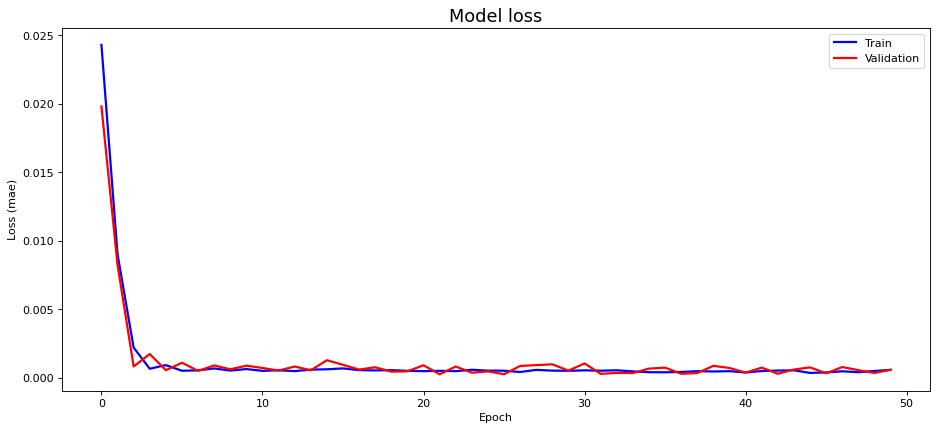

In [19]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(encdec['loss'], 'b', label='Train', linewidth=2)
ax.plot(encdec['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [20]:
encdec['loss']

[0.024299651384353638,
 0.009029645472764969,
 0.0022065439261496067,
 0.0006593555444851518,
 0.0009264941327273846,
 0.0005129698547534645,
 0.000544311769772321,
 0.0006814295775257051,
 0.0005254652933217585,
 0.0006369143375195563,
 0.0005043846322223544,
 0.0005512450006790459,
 0.00048608920769765973,
 0.0005955367814749479,
 0.0006200732896104455,
 0.0006841414724476635,
 0.0005579495918937027,
 0.000537772080861032,
 0.0005573430680669844,
 0.0005063359858468175,
 0.00048430083552375436,
 0.0005082185380160809,
 0.00048264514771290123,
 0.0005852226749993861,
 0.0005226883804425597,
 0.0005168559146113694,
 0.0004223171272315085,
 0.0005773154553025961,
 0.000522906833793968,
 0.0005103281000629067,
 0.0005434732884168625,
 0.0005172293167561293,
 0.0005472440388984978,
 0.00046650925651192665,
 0.0004077644261997193,
 0.00040138993063010275,
 0.0004257501568645239,
 0.00048124484601430595,
 0.0004614782228600234,
 0.00048283967771567404,
 0.000387596053769812,
 0.000493488681

In [21]:
encdec['val_loss']

[0.019806522876024246,
 0.008241741918027401,
 0.0008280299953185022,
 0.0017308981623500586,
 0.0005545762833207846,
 0.0010989704169332981,
 0.0005044041899964213,
 0.000901595747563988,
 0.0006202373187988997,
 0.0008820874500088394,
 0.0007153702317737043,
 0.000526697316672653,
 0.0008220092859119177,
 0.0005465158028528094,
 0.0012812601635232568,
 0.0009455665131099522,
 0.0006004333263263106,
 0.0007678507827222347,
 0.0004475372261367738,
 0.00047164515126496553,
 0.0009139222675003111,
 0.0002542035945225507,
 0.0008233119733631611,
 0.00036951067158952355,
 0.0004664151347242296,
 0.0002620892773848027,
 0.0008636358543299139,
 0.0009261301020160317,
 0.0009828760521486402,
 0.0005253647104837,
 0.0010492303408682346,
 0.0002876530634239316,
 0.0003537296433933079,
 0.00034493545535951853,
 0.0006685664411634207,
 0.0007402115152217448,
 0.00029485017876140773,
 0.0003456264385022223,
 0.0008734501316212118,
 0.0007155615603551269,
 0.00037725004949606955,
 0.000740812974981

### Anomaly Detection

Calculating the threshold that indicates an anomaly.

THRESHOLD FROM PAPER

Reconstruction error mean threshold: 0.0005117800766565647
Reconstruction error std threshold: 0.0009745775963960044


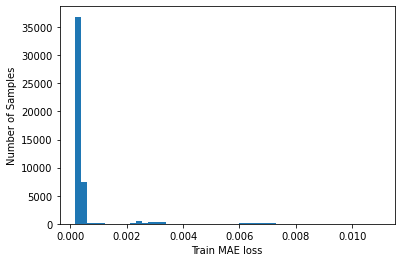

In [22]:
X_train_pred = model.predict(X_train, verbose=0)
train_mae_loss_avg = np.mean(np.abs(X_train_pred - X_train), axis=1)

plt.hist(train_mae_loss_avg, bins=50)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');

mean_threshold = np.mean(train_mae_loss_avg)
std_threshold = np.std(train_mae_loss_avg)

print(f'Reconstruction error mean threshold: {mean_threshold}')
print(f'Reconstruction error std threshold: {std_threshold}')

THRESHOLD USING MAX - it might be more accurate than mean + std because the skewness of the mae loss.

Reconstruction error Max threshold: 0.010954618453979492


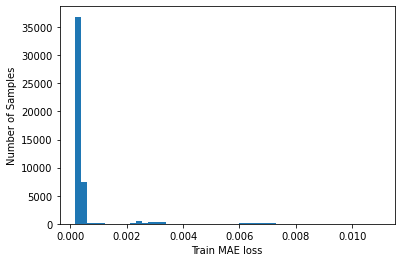

In [23]:
X_train_pred = model.predict(X_train, verbose=0)
train_mae_loss_avg = np.mean(np.abs(X_train_pred - X_train), axis=1)

plt.hist(train_mae_loss_avg, bins=50)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');

max_threshold = np.max(train_mae_loss_avg)

print(f'Reconstruction error Max threshold: {max_threshold}')

## Test Model and Extract Loss

In [24]:
test_mae_loss = []
for i in tqdm(range(0,len(test_batches_yahoo))):
    X_test_pred = model.predict(test_batches_yahoo[i], verbose=0)
    test_mae_loss.append(np.mean(np.abs(X_test_pred-test_batches_yahoo[i]), axis=1))
test_mae_loss

100%|██████████| 1977/1977 [01:02<00:00, 31.73it/s]


[array([[0.00019025],
        [0.00025016],
        [0.00031558],
        [0.00023925],
        [0.00037446],
        [0.00037664],
        [0.0004028 ],
        [0.00039953],
        [0.00038427],
        [0.00036574],
        [0.00026978],
        [0.00025016],
        [0.00026651],
        [0.00025124],
        [0.00026542],
        [0.00023707],
        [0.0002676 ],
        [0.0002796 ],
        [0.00025233],
        [0.00019999],
        [0.00019236],
        [0.00013902],
        [0.00011847],
        [0.00011393]]),
 array([[0.00017617],
        [0.00019704],
        [0.00029954],
        [0.00036605],
        [0.00042275],
        [0.00043583],
        [0.00043256],
        [0.00042057],
        [0.00040858],
        [0.0004064 ],
        [0.00030063],
        [0.00031699],
        [0.00027337],
        [0.00026028],
        [0.00027555],
        [0.000293  ],
        [0.00019131],
        [0.00023847],
        [0.00031176],
        [0.00025156],
        [0.00018858],
        

### Extracting Anomalous Predicted Points

In [25]:
predicted_test_label = []
for i in tqdm(range(0, len(test_mae_loss))):
    for j in tqdm(range(0, len(test_mae_loss[i]))):
        
        # for threshold with mean + std
        #if(test_mae_loss[i][j][0]>(mean_threshold+std_threshold)):
        
        # for threshold with max
        if(test_mae_loss[i][j][0]>(max_threshold)):
            predicted_test_label.append(1)
        else:
            predicted_test_label.append(0)

100%|██████████| 24/24 [00:00<00:00, 264208.13it/s]

100%|██████████| 24/24 [00:00<00:00, 399457.52it/s]

100%|██████████| 24/24 [00:00<00:00, 381300.36it/s]

100%|██████████| 24/24 [00:00<00:00, 374213.00it/s]

100%|██████████| 24/24 [00:00<00:00, 157779.46it/s]

100%|██████████| 24/24 [00:00<00:00, 358232.37it/s]

100%|██████████| 24/24 [00:00<00:00, 328965.02it/s]

100%|██████████| 24/24 [00:00<00:00, 368730.02it/s]

100%|██████████| 24/24 [00:00<00:00, 405900.39it/s]

100%|██████████| 24/24 [00:00<00:00, 353204.55it/s]

100%|██████████| 24/24 [00:00<00:00, 381300.36it/s]

100%|██████████| 24/24 [00:00<00:00, 368730.02it/s]

100%|██████████| 24/24 [00:00<00:00, 149130.81it/s]

100%|██████████| 24/24 [00:00<00:00, 353204.55it/s]

100%|██████████| 24/24 [00:00<00:00, 363405.40it/s]

100%|██████████| 24/24 [00:00<00:00, 391685.98it/s]

100%|██████████| 24/24 [00:00<00:00, 354448.23it/s]

100%|██████████| 24/24 [00:00<00:00, 374213.00it/s]

100%|██████████| 24/24 [00:00<00:00, 201730.05

100%|██████████| 24/24 [00:00<00:00, 381300.36it/s]

100%|██████████| 24/24 [00:00<00:00, 176602.27it/s]

100%|██████████| 24/24 [00:00<00:00, 351969.57it/s]

100%|██████████| 24/24 [00:00<00:00, 368730.02it/s]

100%|██████████| 24/24 [00:00<00:00, 158774.91it/s]

100%|██████████| 24/24 [00:00<00:00, 220752.84it/s]

100%|██████████| 24/24 [00:00<00:00, 160037.04it/s]

100%|██████████| 24/24 [00:00<00:00, 224194.42it/s]

100%|██████████| 24/24 [00:00<00:00, 387166.52it/s]

100%|██████████| 24/24 [00:00<00:00, 363405.40it/s]

100%|██████████| 24/24 [00:00<00:00, 368730.02it/s]

100%|██████████| 24/24 [00:00<00:00, 336666.54it/s]

100%|██████████| 24/24 [00:00<00:00, 146312.93it/s]

100%|██████████| 24/24 [00:00<00:00, 358232.37it/s]

100%|██████████| 24/24 [00:00<00:00, 323676.19it/s]

100%|██████████| 24/24 [00:00<00:00, 370085.65it/s]

100%|██████████| 24/24 [00:00<00:00, 347114.81it/s]

100%|██████████| 24/24 [00:00<00:00, 343560.74it/s]

100%|██████████| 24/24 [00:00<00:00, 158774.91

100%|██████████| 24/24 [00:00<00:00, 304118.72it/s]

100%|██████████| 24/24 [00:00<00:00, 307838.83it/s]

100%|██████████| 24/24 [00:00<00:00, 315558.92it/s]

100%|██████████| 24/24 [00:00<00:00, 299593.14it/s]

100%|██████████| 24/24 [00:00<00:00, 293479.00it/s]

100%|██████████| 24/24 [00:00<00:00, 141182.74it/s]

100%|██████████| 24/24 [00:00<00:00, 83676.89it/s]

100%|██████████| 24/24 [00:00<00:00, 176602.27it/s]

100%|██████████| 24/24 [00:00<00:00, 272800.26it/s]

100%|██████████| 24/24 [00:00<00:00, 136215.56it/s]

100%|██████████| 24/24 [00:00<00:00, 323676.19it/s]

100%|██████████| 24/24 [00:00<00:00, 212818.81it/s]

100%|██████████| 24/24 [00:00<00:00, 137894.93it/s]

100%|██████████| 24/24 [00:00<00:00, 333322.17it/s]

100%|██████████| 24/24 [00:00<00:00, 311651.07it/s]

100%|██████████| 24/24 [00:00<00:00, 374213.00it/s]

100%|██████████| 24/24 [00:00<00:00, 343560.74it/s]

100%|██████████| 24/24 [00:00<00:00, 201730.05it/s]

100%|██████████| 24/24 [00:00<00:00, 156067.13i

100%|██████████| 24/24 [00:00<00:00, 407543.71it/s]

100%|██████████| 24/24 [00:00<00:00, 426539.39it/s]

100%|██████████| 24/24 [00:00<00:00, 187454.93it/s]

100%|██████████| 24/24 [00:00<00:00, 375609.31it/s]

100%|██████████| 24/24 [00:00<00:00, 250406.21it/s]

100%|██████████| 24/24 [00:00<00:00, 409200.39it/s]

100%|██████████| 24/24 [00:00<00:00, 399457.52it/s]

100%|██████████| 24/24 [00:00<00:00, 387166.52it/s]

100%|██████████| 24/24 [00:00<00:00, 165564.63it/s]

100%|██████████| 24/24 [00:00<00:00, 348315.90it/s]

100%|██████████| 24/24 [00:00<00:00, 415964.03it/s]

100%|██████████| 24/24 [00:00<00:00, 401048.99it/s]

100%|██████████| 24/24 [00:00<00:00, 348315.90it/s]

100%|██████████| 24/24 [00:00<00:00, 407543.71it/s]

100%|██████████| 24/24 [00:00<00:00, 170327.07it/s]

100%|██████████| 24/24 [00:00<00:00, 387166.52it/s]

100%|██████████| 24/24 [00:00<00:00, 374213.00it/s]

100%|██████████| 24/24 [00:00<00:00, 375609.31it/s]

100%|██████████| 24/24 [00:00<00:00, 168052.25

100%|██████████| 24/24 [00:00<00:00, 393216.00it/s]

100%|██████████| 24/24 [00:00<00:00, 263516.48it/s]

100%|██████████| 24/24 [00:00<00:00, 203360.19it/s]

100%|██████████| 24/24 [00:00<00:00, 217885.92it/s]

100%|██████████| 24/24 [00:00<00:00, 419430.40it/s]

100%|██████████| 24/24 [00:00<00:00, 374213.00it/s]

100%|██████████| 24/24 [00:00<00:00, 401048.99it/s]

100%|██████████| 24/24 [00:00<00:00, 414252.25it/s]

100%|██████████| 24/24 [00:00<00:00, 363405.40it/s]

100%|██████████| 24/24 [00:00<00:00, 407543.71it/s]

100%|██████████| 24/24 [00:00<00:00, 203360.19it/s]

100%|██████████| 24/24 [00:00<00:00, 129720.74it/s]

100%|██████████| 24/24 [00:00<00:00, 195083.91it/s]

100%|██████████| 24/24 [00:00<00:00, 342392.16it/s]

100%|██████████| 24/24 [00:00<00:00, 381300.36it/s]

100%|██████████| 24/24 [00:00<00:00, 164482.51it/s]

100%|██████████| 24/24 [00:00<00:00, 435771.84it/s]

100%|██████████| 24/24 [00:00<00:00, 401048.99it/s]

100%|██████████| 24/24 [00:00<00:00, 381300.36

In [26]:
f1_score(label_test, predicted_test_label, average='weighted')

0.939869245006162

In [27]:
f1_score(label_test, predicted_test_label, average='macro')

0.507602952702258

In [28]:
f1_score(label_test, predicted_test_label, average='micro')

0.9202453987730062

In [29]:
precision_score(label_test, predicted_test_label, average='weighted')

0.9613044880669263

In [30]:
precision_score(label_test, predicted_test_label, average='macro')

0.50908783075154

In [31]:
precision_score(label_test, predicted_test_label, average='micro')

0.9202453987730062

In [32]:
recall_score(label_test, predicted_test_label, average='weighted')

0.9202453987730062

In [33]:
recall_score(label_test, predicted_test_label, average='macro')

0.5271137766620846

In [34]:
recall_score(label_test, predicted_test_label, average='micro')

0.9202453987730062

## Save Results

In [39]:
df_results = pd.DataFrame()

In [41]:
df_results['true_labels'] = label_test
df_results['lstmae_static_labels'] = predicted_test_label

In [43]:
df_results[(df_results.true_labels == 1) & (df_results.lstmae_static_labels == 1)]

,true_labels,lstmae_static_labels
61694,1,1
62113,1,1
62336,1,1
62337,1,1
62338,1,1
...,...,...
86546,1,1
86547,1,1
86735,1,1
86834,1,1


In [44]:
df_results.to_csv('./results/predictions_real_labels.csv')

# Plot Anomalies in Test

In [35]:
test_mae_loss_plot = []
for i in range(0, len(test_batches_yahoo)):
    for j in range(0, len(test_batches_yahoo[i])):
        test_mae_loss_plot.append(test_batches_yahoo[i][j][0])
test_mae_loss_plot

[0.0006429111737287612,
 0.00022479411668837804,
 0.00015735588168186462,
 0.00023603382252279694,
 9.666147017600256e-05,
 9.441352900911877e-05,
 6.743823500651341e-05,
 7.081014675683908e-05,
 8.654573492502555e-05,
 0.00010565323484353768,
 0.00020456264618642401,
 0.00022479411668837804,
 0.00020793455793674968,
 0.00022367014610493615,
 0.00020905852852019156,
 0.0002382817636896807,
 0.0002068105873533078,
 0.000194446910935447,
 0.00022254617552149426,
 0.00027649676352670496,
 0.0002843645576107982,
 0.0003461829397001022,
 0.0005372579388852236,
 0.00039676161595498724,
 0.0003405630867828927,
 0.00031246382219684546,
 0.0002068105873533078,
 0.00013824838176335248,
 7.980191142437421e-05,
 6.631426442307152e-05,
 6.96861761733972e-05,
 8.204985259125798e-05,
 9.441352900911877e-05,
 9.666147017600256e-05,
 0.0002056866167698659,
 0.00018882705801823754,
 0.00023378588135591316,
 0.00024727352835721584,
 0.0002315379401890294,
 0.00021355441085395914,
 0.00031920764569749684,

In [36]:
[i for i,v in enumerate(test_mae_loss_plot) if v > max_threshold]

[13664,
 13665,
 13666,
 13667,
 13668,
 13669,
 13670,
 13671,
 13672,
 13673,
 13674,
 13675,
 13676,
 13677,
 13678,
 13679,
 13680,
 13681,
 13682,
 13683,
 13684,
 13685,
 13686,
 13687,
 13688,
 13689,
 13690,
 13691,
 13692,
 13693,
 13694,
 13695,
 13696,
 13697,
 13698,
 13699,
 13700,
 13701,
 13702,
 13703,
 13704,
 13705,
 13706,
 13707,
 13708,
 13709,
 13710,
 13711,
 13712,
 13713,
 13714,
 13715,
 13716,
 13717,
 13718,
 13719,
 13720,
 13721,
 13722,
 13723,
 13724,
 13725,
 13726,
 13727,
 13728,
 13729,
 13730,
 13731,
 13732,
 13733,
 13734,
 13735,
 13736,
 13737,
 13738,
 13739,
 13740,
 13741,
 13742,
 13743,
 13744,
 13745,
 13746,
 13747,
 13748,
 13749,
 13750,
 13751,
 13752,
 13753,
 13754,
 13755,
 13756,
 13757,
 13758,
 13759,
 13760,
 13761,
 13762,
 13763,
 13764,
 13765,
 13766,
 13767,
 13768,
 13769,
 13770,
 13771,
 13772,
 13773,
 13774,
 13775,
 13776,
 13777,
 13778,
 13779,
 13780,
 13781,
 13782,
 13783,
 13784,
 13785,
 13786,
 13787,
 13788,


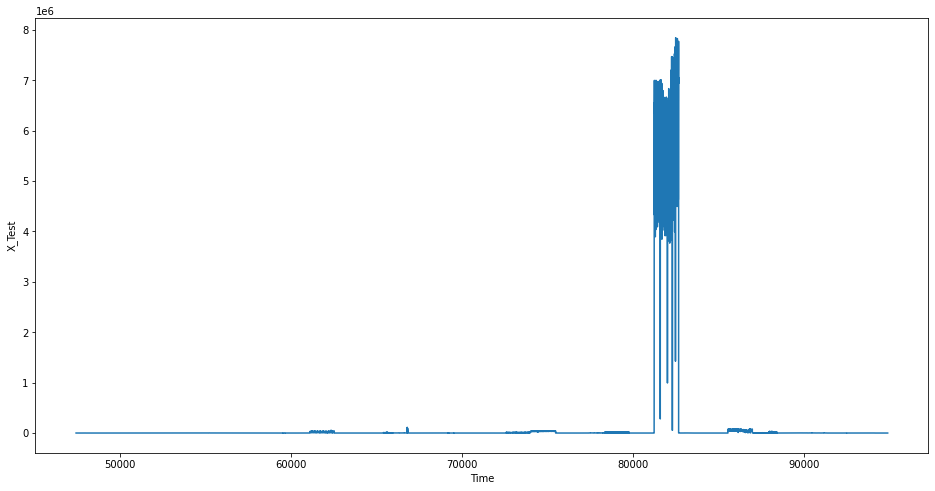

In [37]:
plt.figure(figsize=(16,8))
plt.plot(test_yahoo)
plt.xlabel('Time')
plt.ylabel('X_Test');

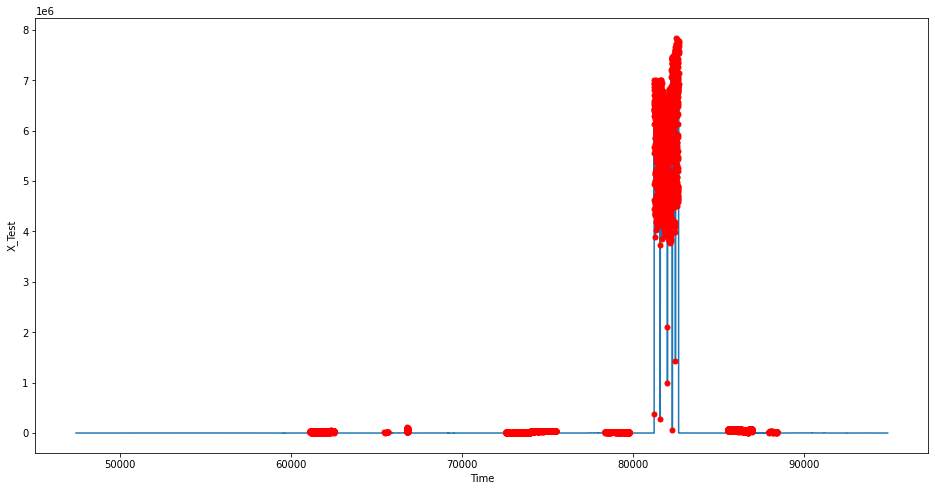

In [38]:
markers_on = [i for i,v in enumerate(test_mae_loss_plot) if v > max_threshold]
plt.figure(figsize=(16,8))
plt.plot(test_yahoo, markevery=markers_on, marker = 'o', mec = 'r', mfc = 'r', ms = 5)
plt.xlabel('Time')
plt.ylabel('X_Test');